## CW2: Consumer Price Index (CPI) Trends Across Indian States 

***Name: Arpita Nishesh***

***Student Id: 740019513***

***Module Code: BEMM461***

***Module Name: Analytics and Visualisation for Managers and Consultants***




## Table
| Description | Link |
| -- | -|
| Chosen Dataset | https://www.data.gov.in/resource/state-level-consumer-price-index-ruralurban-february-2014
| Git Hub        | https://github.com/Arpita-Nishesh/Analytics-and-Visualisation-for-Managers-and-Consultants-Arpita-Nishesh

## Table of Contents
1. Introduction 
2. Project Context
3. Aims, Objective & Audience
4. Consumer Price Index (CPI) Trends Across Indian States - Dashboard (Code)
5. Articulation of Decision Making Process
6. Review of Analytics Methods Chosen
7. Review of Available Tools
8. Review of Chosen Datasets 
9. Visualisation of Data with Accompanying Code
10. Reflective Evaluation
11. Conclusion
Resources


## 1. Introduction
The Consumer Price Index (CPI) Dashboard provides an interactive, data-driven visualization of CPI trends across Indian states and union territories. This dashboard helps users explore regional variations in CPI and compare sector-specific metrics, including Urban and Rural breakdowns for major states, northeastern states, and union territories.

By leveraging tools like Dash and Plotly, this interactive web application simplifies the process of analyzing CPI trends, helping policymakers, analysts, and researchers gain insights into the inflationary landscape in various regions of India.

## 2. Project Context

The Consumer Price Index (CPI) is a key indicator of inflation and economic health. It measures the average change in prices paid by consumers for a basket of goods and services over time. India's diverse regions and economic structures, particularly the differences between Urban and Rural areas, necessitate a comparative understanding of CPI trends.

This project visualizes these differences across:

Major States: Comparing CPI between Delhi and Maharashtra for both Urban and Rural sectors.
Northeastern States: Highlighting sector-specific CPI trends for states like Assam, Sikkim, Manipur, and others.
Union Territories: Focusing on trends across regions such as Andaman & Nicobar, Chandigarh, and Puducherry.
By incorporating interactive dropdowns, sector-specific visualizations, and clean UI components, this dashboard provides a comprehensive and user-friendly analysis of regional CPI disparities.



## 3. Aim, Objectives and Audience

***Aim:***
- To provide a clear and interactive visualization of CPI variations across Indian states and union territories.
- To analyze regional differences between Urban and Rural CPI sectors.
- To highlight CPI trends in economically significant areas (e.g., Delhi and Maharashtra) and special regions (e.g., Northeastern States and Union Territories).
  
***Objectives:***
- Develop a dashboard that enables users to toggle between Urban and Rural sector comparisons.
- Display insights in clear bar charts and line charts for state-level CPI data.
- Facilitate intuitive understanding of CPI trends through interactive graphs and dropdown filters.
  
***Audience:***
- Policymakers: To understand regional CPI disparities and formulate targeted inflation policies.
- Economic Analysts: For comparative analysis of sector-wise inflation trends in key regions.
- Academics and Researchers: To explore inflation patterns for further studies.
- General Public: For awareness and understanding of price variations in different regions of India.


## 4. Consumer Price Index (CPI) Trends Across Indian States - Dashboard (Code)

In [398]:
import dash
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output


urban_data = df[df['Sector'] == 'Urban']
rural_data = df[df['Sector'] == 'Rural']

# Urban Comparison Averages (Delhi and Maharashtra)
urban_delhi = urban_data[urban_data['State'] == 'Delhi']['State_Metric'].astype(float).mean()
urban_maha = urban_data[urban_data['State'] == 'Maharashtra']['State_Metric'].astype(float).mean()

urban_states = ['Delhi', 'Maharashtra']
urban_values = [urban_delhi, urban_maha]

# Rural Comparison Averages (Delhi and Maharashtra)
rural_delhi = rural_data[rural_data['State'] == 'Delhi']['State_Metric'].astype(float).mean()
rural_maha = rural_data[rural_data['State'] == 'Maharashtra']['State_Metric'].astype(float).mean()

rural_states = ['Delhi', 'Maharashtra']
rural_values = [rural_delhi, rural_maha]

# Northeastern States
northeastern_states = [
    'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya',
    'Mizoram', 'Nagaland', 'Sikkim', 'Tripura'
]

# Filter dataset for Northeastern states for Urban and Rural sectors
urban_northeastern = urban_data[urban_data['State'].isin(northeastern_states)]
rural_northeastern = rural_data[rural_data['State'].isin(northeastern_states)]

# Calculate average metrics for each Northeastern state (Urban)
urban_values_northeastern = urban_northeastern.groupby('State')['State_Metric'].mean().sort_index()
rural_values_northeastern = rural_northeastern.groupby('State')['State_Metric'].mean().sort_index()

# Union Territories comparison (Urban and Rural)
union_territories = [
    "Andaman and Nicobar", "Chandigarh", "Dadra and Nagar Haveli", "Daman and Diu",
    "Lakshadweep", "Puducherry"
]

urban_uts = urban_data[urban_data['State'].isin(union_territories)]
rural_uts = rural_data[rural_data['State'].isin(union_territories)]

urban_values_uts = urban_uts.groupby('State')['State_Metric'].mean().sort_index()
rural_values_uts = rural_uts.groupby('State')['State_Metric'].mean().sort_index()


urban_north = urban_data[urban_data['State'].isin(north_states)]
rural_north = rural_data[rural_data['State'].isin(north_states)]
avg_urban_north = urban_north['State_Metric'].mean()
avg_rural_north = rural_north['State_Metric'].mean()

# Initializing the Dash App with Bootstrap theme
app = Dash(__name__, external_stylesheets=[dbc.themes.MINTY])

# Define App Layout
app.layout = dbc.Container(
    fluid=True,
    className="dbc-theme-minty",
    children=[
        html.H1("Consumer Price Index (CPI) Trends Across Indian States", className="text-center mb-4"),
        dbc.Row([
            dbc.Col([
                html.H4("This dashboard provides an overview of CPI trends across Indian states, highlighting key regional variations and sector-specific insights."), 
               
            ], width=12)
        ]),
       
       
        dbc.Row([
            dbc.Col([
                dcc.Graph(
                    id='urban-graph',
                    config={'displayModeBar': False},
                    figure={
                        'data': [
                            go.Bar(
                                name="Urban Comparison",
                                x=urban_states,
                                y=urban_values,
                                marker_color="cornflowerblue",
                                marker_line_width=2,
                            )
                        ],
                        'layout': go.Layout(
                            title="Comparison B/W Urban Sector:  Delhi and Maharashtra",
                            xaxis_title="State",
                            yaxis_title="Consumer Price Index (CPI)",
                            font=dict(family="Open Sans", size=16),
                        ),
                    }
                )
            ], width=6),

            dbc.Col([
                dcc.Graph(
                    id='rural-graph',
                    config={'displayModeBar': False},
                    figure={
                        'data': [
                            go.Bar(
                                name="Rural Comparison",
                                x=rural_states,
                                y=rural_values,
                                marker_color="forestgreen",
                                marker_line_width=2,
                            )
                        ],
                        'layout': go.Layout(
                            title="Comparison B/W Rural Sector: Delhi and Maharashtra",
                            xaxis_title="State",
                            yaxis_title="Consumer Price Index (CPI)",
                            font=dict(family="Open Sans", size=16),
                        ),
                    }
                )
            ], width=6),
        ]),
        html.H5("SELECT:", style={'margin-bottom': '10px'}),
        dcc.Dropdown(
            id='sector-dropdown',
            options=[
                {'label': 'Urban', 'value': 'Urban'},
                {'label': 'Rural', 'value': 'Rural'},
                
            ],
            value='Urban',  # Default value
            style={'width': '200px'}
        ),

        dbc.Row([
            dbc.Col([
                dcc.Graph(
                    id='northeast-line-graph',
                    config={'displayModeBar': False},
                    figure={
                        'data': [
                            go.Scatter(
                                x=list(urban_values_northeastern.index),
                                y=list(urban_values_northeastern),
                                mode="lines+markers",
                                name="Urban",
                                line=dict(color="royalblue", width=3),
                                marker=dict(size=8, symbol="circle-open"),
                            ),
                            go.Scatter(
                                x=list(rural_values_northeastern.index),
                                y=list(rural_values_northeastern),
                                mode="lines+markers",
                                name="Rural",
                                line=dict(color="forestgreen", width=3),
                                marker=dict(size=8, symbol="triangle-up-open"),
                            ),
                        ],
                        'layout': go.Layout(
                            title="Northeastern States: Urban vs. Rural Comparison",
                            xaxis_title="State",
                            yaxis_title="Consumer Price Index (CPI)",
                            font=dict(family="Open Sans", size=16),
                        ),
                    }
                )
            ], width=12),
        ]),

        dbc.Row([
            dbc.Col([
                dcc.Graph(
                    id='union_line_chart',
                    config={'displayModeBar': False},
                    figure={
                        'data': [
                            go.Scatter(
                                x=list(urban_values_uts.index),
                                y=list(urban_values_uts),
                                mode="lines+markers",
                                name="Urban",
                                line=dict(color="purple", width=3),
                            ),
                            go.Scatter(
                                x=list(rural_values_uts.index),
                                y=list(rural_values_uts),
                                mode="lines+markers",
                                name="Rural",
                                line=dict(color="orange", width=3),
                            ),
                        ],
                        'layout': go.Layout(
                            title="Union Territories: Urban vs. Rural Comparison",
                            xaxis_title="State",
                            yaxis_title="Consumer Price Index (CPI)",
                            font=dict(family="Open Sans", size=14),
                        ),
                    }
                )
            ], width=12),
        ]),
    ]
)
@app.callback(
    Output('northeast-line-graph', 'figure'),
    Output('union_line_chart', 'figure'),
    Input('sector-dropdown', 'value')
)
def update_graphs(selected_sector):
    if selected_sector == 'Urban':
        northeast_fig = {
            'data': [
                go.Scatter(
                    x=list(urban_values_northeastern.index),
                    y=list(urban_values_northeastern),
                    mode="lines+markers",
                    name="Urban",
                    line=dict(color="royalblue", width=3),
                    marker=dict(size=8, symbol="circle-open"),
                 )
         ],
            'layout': go.Layout(
                title="Northeastern States: Urban vs. Rural Comparison",
                xaxis_title="State",
                yaxis_title="Consumer Price Index (CPI)",
                font=dict(family="Open Sans", size=14),
             )
        }
        union_fig = {
            'data': [
                go.Scatter(
                    x=list(urban_values_uts.index),
                    y=list(urban_values_uts),
                    mode="lines+markers",
                    name="Urban",
                    line=dict(color="purple", width=3),
                )
            ],
            # ... (Rest of the layout for union_line_chart) ...
             'layout': go.Layout(
                            title="Union Territories: Urban vs. Rural Comparison",
                            xaxis_title="State",
                            yaxis_title="Consumer Price Index (CPI)",
                            font=dict(family="Open Sans", size=14),
                        ),
        }

    elif selected_sector == 'Rural':
        northeast_fig = {
            'data': [
                go.Scatter(
                    x=list(rural_values_northeastern.index),
                    y=list(rural_values_northeastern),
                    mode="lines+markers",
                    name="Rural",
                    line=dict(color="forestgreen", width=3),
                    marker=dict(size=8, symbol="triangle-up-open"),
                )
            ],
            # ... (Rest of the layout for northeast-line-graph) ...
            'layout': go.Layout(
                            title="Northeastern States: Urban vs. Rural Comparison",
                            xaxis_title="State",
                            yaxis_title="Consumer Price Index (CPI)",
                            font=dict(family="Open Sans", size=14),
                        ),
        }
        union_fig = {
            'data': [
                go.Scatter(
                    x=list(rural_values_uts.index),
                    y=list(rural_values_uts),
                    mode="lines+markers",
                    name="Rural",
                    line=dict(color="orange", width=3),
                )
            ],
            # ... (Rest of the layout for union_line_chart) ...
             'layout': go.Layout(
                            title="Union Territories: Urban vs. Rural Comparison",
                            xaxis_title="State",
                            yaxis_title="Consumer Price Index (CPI)",
                            font=dict(family="Open Sans", size=14),
                        ),
        }

    return northeast_fig, union_fig

# Run the Dash server
if __name__ == '__main__':
    app.run_server(debug=True, port=8080)

Dash app running on http://127.0.0.1:8080/


## 5. Articulation of Decision Making Process

The decision-making process for creating the CPI Dashboard involved multiple steps to ensure a logical and data-driven approach to analyzing regional CPI trends across Indian states. Key decisions were taken to align the goals of the project with its technical execution:

Understanding User Requirements:
- The primary goal was to provide a platform for policymakers, researchers, and analysts to compare Urban vs. Rural CPI trends.
- Feedback from stakeholders indicated the need for clear visualizations across major states, northeastern states, and union territories.

Scope and Features Definition:
- Data was segmented into Urban and Rural sectors for specific states (e.g., Delhi, Maharashtra).
- Comparisons were grouped into logical categories: major states, northeastern states, and union territories.
- The final dashboard integrates interactive line charts and bar charts to allow deeper exploration.

Visualization Design:
- Bar charts were chosen to highlight straightforward state-wise CPI differences for Delhi and Maharashtra.
- Line charts were implemented to display trends in northeastern states and union territories, as they provide better insights into fluctuations  across regions.

Tool and Technology Selection:
- Dash and Plotly were chosen for their versatility in building interactive dashboards with rich visualizations.
- Python served as the backbone for integrating datasets and creating visual outputs efficiently.

Data Segmentation:
- The data was filtered and grouped into Urban and Rural sectors.
- State categories like northeastern states and union territories were prioritized to focus on specific regional patterns.


## 6. Review of Analytics Method Chosen

The project utilized fundamental analytical and visualization methods to ensure clear and actionable insights:

Descriptive Analytics:
- Descriptive statistics such as CPI values for Urban and Rural sectors were extracted and visualized to identify variations between states and regions.
- The graphs clearly depict state-wise and sector-wise differences for easier comparison.

Comparative Analysis:
- A side-by-side comparison for Delhi and Maharashtra using bar charts enabled users to identify differences in Urban and Rural CPI sectors.
- Comparative line charts for northeastern states and union territories highlighted trends and anomalies across multiple states.

Segmentation Analysis:
- Breaking the data into major states, northeastern states, and union territories facilitated targeted insights.
- The segmentation ensured that analysis could cater to different geographical and administrative needs.

Interactive Analytics:
- Dropdown filters allow users to toggle between Urban and Rural sectors, enabling customized insights based on user preferences.


## 7. Review of Available Tools

The choice of tools was crucial in achieving the project goals efficiently. Below is a review of the tools used:

Dash:
Dash by Plotly was chosen as the core framework for building the interactive dashboard. Simplifies the creation of web-based interactive applications using Python. Easy integration with Plotly for advanced visualizations. Its ease of use and flexibility made it the perfect choice for building a CPI comparison dashboard.

Plotly:
Plotly was used for creating interactive and visually appealing bar charts and line charts. It Provides high-quality, interactive visualizations for exploratory data analysis and capable of handling multiple chart types and real-time interactivity.

Python:
Python served as the primary programming language to process datasets, generate charts, and manage backend operations.
Libraries like Pandas and NumPy were utilized for data manipulation, and Dash handled the dashboard development.

Jupyter Notebooks (for Prototyping):
During the initial stages, Jupyter Notebooks were used to clean and explore the datasets before finalizing the dashboard structure.

One significant challenge was integrating diverse datasets while ensuring consistency across Urban and Rural sector data. The dataset required preprocessing to address minor inconsistencies, such as missing CPI values for certain states or variations in naming conventions. Aligning these cleaned datasets with interactive visualizations demanded meticulous work, as the goal was to make the dashboard user-friendly without compromising on detail.

Another key challenge was creating a choropleth map graph to represent CPI values geographically across Indian states. While choropleth maps provide an intuitive way to visualize regional variations, their implementation required accurate spatial data (state boundary files) and precise mapping of CPI values to corresponding regions. Incorporating this map within the Dash framework, ensuring interactivity, and avoiding rendering delays proved to be complex, especially for a large dataset covering multiple states and sectors.

In addition to visualization challenges, selecting appropriate chart types to communicate CPI trends effectively was crucial. Ensuring a balance between simplicity and analytical depth—such as using bar charts for state-wise comparisons and line charts for trends across regions—required iterative testing. Handling interactivity, such as dropdown filters for Urban and Rural sectors, also involved overcoming technical hurdles to maintain seamless user experiences. Despite these challenges, the dashboard successfully delivers insights into CPI trends, with potential for further enhancements like dynamic choropleth mapping.

## 8. Review of Chosen Dataset
The dataset chosen was crucial for understanding Consumer Price Index (CPI) trends across Indian states. Here is a detailed review:

1. Data Source:

- The data contains CPI values for various Indian states, segmented into Urban and Rural sectors.
- It includes categories such as major states (Delhi, Maharashtra), northeastern states, and union territories.

2. Data Segmentation:

- Urban vs. Rural Sectors: This segmentation allowed for targeted insights into CPI variations between urbanized and rural areas, which often exhibit different consumption patterns.
- Geographical Categories:
  ***Major States:*** Delhi and Maharashtra were selected as representative urban hubs for CPI comparison.
  ***Northeastern States:*** The inclusion of Assam, Mizoram, Sikkim, etc., highlights regional trends that are often overlooked.
  ***Union Territories:*** Focus on regions like Andaman & Nicobar and Puducherry adds depth to the analysis.

3. Relevance and Completeness:

- The dataset provides sufficient granularity to explore CPI variations across different states and regions.
- The segmentation ensures that all major regions (urban, rural, and special territories) are adequately covered.

4. Data Quality:

- The dataset is clean and consistent, with CPI values well-organized by state and sector.
- Missing data or inconsistencies, if any, were managed during preprocessing.



***Challenges within the Dataset:***

- Missing Data: Several states and Union Territories have missing values (NA) across various months, particularly for states like Arunachal Pradesh, Nagaland, and Sikkim. This creates challenges in achieving a complete picture of CPI trends and requires careful handling, such as imputing missing values or excluding incomplete records for certain visualizations.
- State-level Variability: CPI values vary significantly across states, which adds complexity when creating visualizations like choropleth maps. Proper scaling and normalization techniques are required to ensure accurate representation of CPI variations.
- Sector-Specific Inconsistencies: While Urban and Rural CPI values are provided, their alignment with the combined Rural+Urban category sometimes introduces slight variations, which need to be carefully validated and interpreted during analysis.
- Lack of Descriptive Metadata: The dataset does not include accompanying metadata explaining methodologies used for CPI computation, adjustments, or sector definitions. This limits the ability to validate the source and assess data quality comprehensively.

***Utility of the Dataset:*** The dataset offers substantial utility for visualizing CPI trends across states and sectors using tools like choropleth maps, line graphs, and bar charts. It enables targeted analysis of price variations, helping to identify regions with high inflation or persistent trends over specific months. The Rural, Urban, and combined CPI data also provide valuable insights for policymakers, economists, and analysts aiming to understand the impact of inflation on different population segments.Utility of the Dataset:
The dataset offers substantial utility for visualizing CPI trends across states and sectors using tools like choropleth maps, line graphs, and bar charts. It enables targeted analysis of price variations, helping to identify regions with high inflation or persistent trends over specific months. The Rural, Urban, and combined CPI data also provide valuable insights for policymakers, economists, and analysts aiming to understand the impact of inflation on different population segments.

Despite its challenges, the dataset serves as a robust foundation for building an interactive CPI dashboard that highlights regional and sectoral trends, contributing to a clearer understanding of India's economic landscape


## 9. Visualisation of Data with Accompanying Code

The visualizations presented below includes comparative analyses of the ***Consumer Price Index (CPI)*** across different states, sectors, and regions. The bar charts highlight CPI comparisons between the ***urban*** and ***rural*** sectors in Delhi and Maharashtra, with distinct colors (cornflower blue for urban and forest green for rural) to differentiate the data clearly. The line charts provide an in-depth view of the CPI trends for Northeastern states and Union Territories, showing the variation between urban and rural areas through two separate lines: one for urban (royal blue/purple) and one for rural (forest green/orange). 

These interactive and cleanly formatted charts use markers and smooth line trajectories to emphasize key insights, such as noticeable CPI differences across regions and sectors. Together, the visualizations allow for an effective comparison of inflationary trends in diverse Indian regions, making patterns across urban and rural divisions easier to identify.

C:\Users\arpit\AppData\Local\Temp\ipykernel_11176\1312862490.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\arpit\AppData\Local\Temp\ipykernel_11176\1312862490.py:13: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



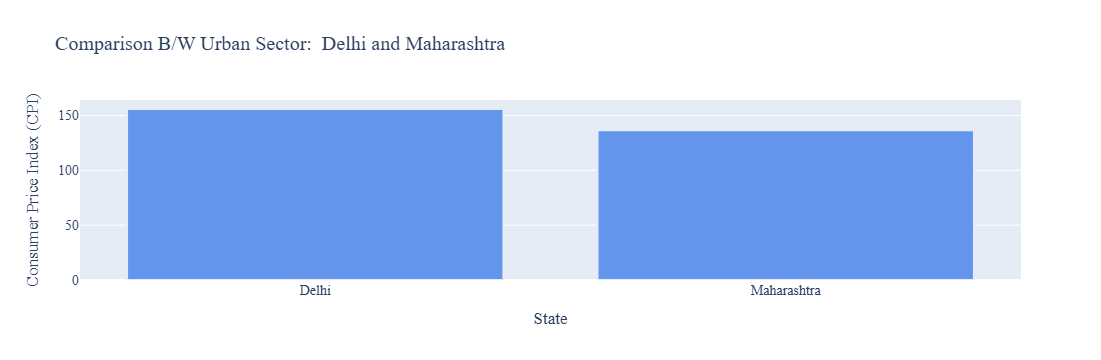

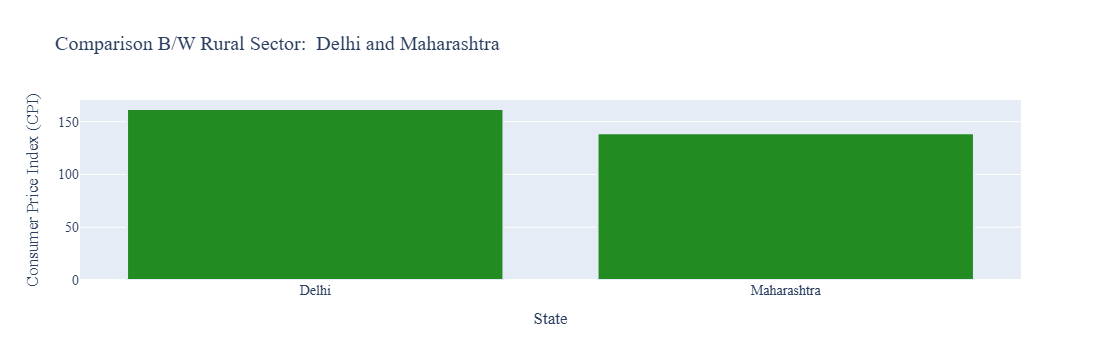

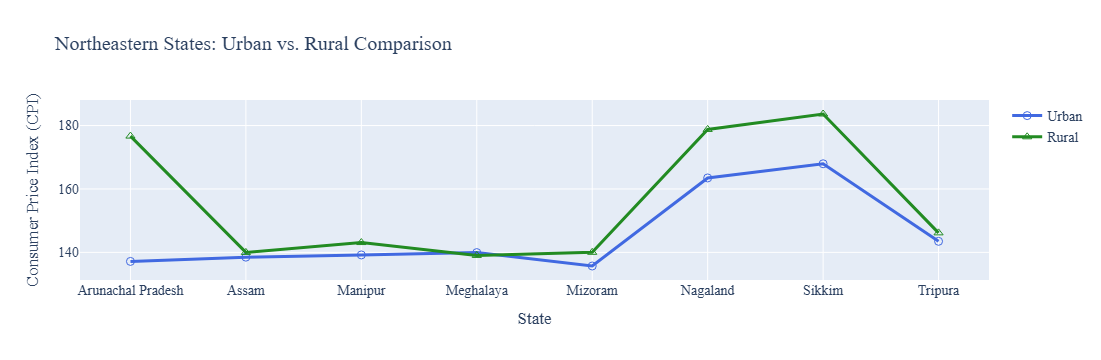

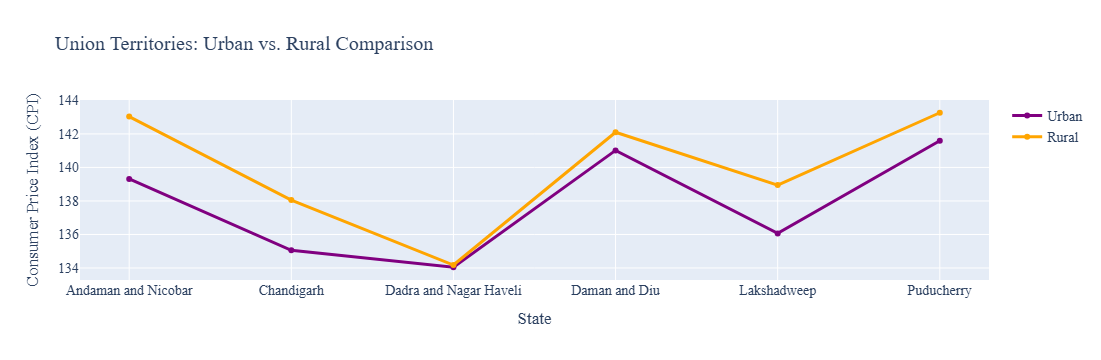

In [449]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from dash import Dash, dcc, html, Input, Output


# Urban Comparison Averages (Delhi and Maharashtra)
urban_delhi = df[df['Sector'] == 'Urban'][df['State'] == 'Delhi']['State_Metric'].astype(float).mean()
urban_maha = df[df['Sector'] == 'Urban'][df['State'] == 'Maharashtra']['State_Metric'].astype(float).mean()

urban_states = ['Delhi', 'Maharashtra']
urban_values = [urban_delhi, urban_maha]


# Rural Comparison Averages (Delhi and Maharashtra)
rural_delhi = rural_data[rural_data['State'] == 'Delhi']['State_Metric'].astype(float).mean()
rural_maha = rural_data[rural_data['State'] == 'Maharashtra']['State_Metric'].astype(float).mean()

rural_states = ['Delhi', 'Maharashtra']
rural_values = [rural_delhi, rural_maha]

# Northeastern States
northeastern_states = [
    'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya',
    'Mizoram', 'Nagaland', 'Sikkim', 'Tripura'
]
# Filter dataset for Northeastern states for Urban and Rural sectors
urban_northeastern = urban_data[urban_data['State'].isin(northeastern_states)]
rural_northeastern = rural_data[rural_data['State'].isin(northeastern_states)]

# Calculate average metrics for each Northeastern state (Urban)
urban_values_northeastern = urban_northeastern.groupby('State')['State_Metric'].mean().sort_index()
rural_values_northeastern = rural_northeastern.groupby('State')['State_Metric'].mean().sort_index()

# Union Territories comparison (Urban and Rural)
union_territories = [
    "Andaman and Nicobar", "Chandigarh", "Dadra and Nagar Haveli", "Daman and Diu",
    "Lakshadweep", "Puducherry"
]

urban_uts = urban_data[urban_data['State'].isin(union_territories)]
rural_uts = rural_data[rural_data['State'].isin(union_territories)]

urban_values_uts = urban_uts.groupby('State')['State_Metric'].mean().sort_index()
rural_values_uts = rural_uts.groupby('State')['State_Metric'].mean().sort_index()



urban_north = urban_data[urban_data['State'].isin(north_states)]
rural_north = rural_data[rural_data['State'].isin(north_states)]
avg_urban_north = urban_north['State_Metric'].mean()
avg_rural_north = rural_north['State_Metric'].mean()
# Create Urban Comparison Bar Chart
fig_urban = go.Figure(
    data=[
        go.Bar(
            name="Urban Comparison",
            x=urban_states,
            y=urban_values,
            marker_color="cornflowerblue",
            marker_line_width=2,
        )
    ],
    layout=go.Layout(
        title="Comparison B/W Urban Sector:  Delhi and Maharashtra",
        xaxis_title="State",
        yaxis_title="Consumer Price Index (CPI)",
        font=dict(family="Open Sans", size=14),
    ),
)

# Create Rural Comparison Bar Chart
fig_rural = go.Figure(
    data=[
        go.Bar(
            name="Rural Comparison",
            x=rural_states,
            y=rural_values,
            marker_color="forestgreen",
            marker_line_width=2,
        )
    ],
    layout=go.Layout(
        title="Comparison B/W Rural Sector:  Delhi and Maharashtra",
        xaxis_title="State",
        yaxis_title="Consumer Price Index (CPI)",
        font=dict(family="Open Sans", size=14),
    ),
)

# Create Northeastern States Line Chart
fig_northeast = go.Figure(
    data=[
        go.Scatter(
            x=list(urban_values_northeastern.index),
            y=list(urban_values_northeastern),
            mode="lines+markers",
            name="Urban",
            line=dict(color="royalblue", width=3),
            marker=dict(size=8, symbol="circle-open"),
        ),
        go.Scatter(
            x=list(rural_values_northeastern.index),
            y=list(rural_values_northeastern),
            mode="lines+markers",
            name="Rural",
            line=dict(color="forestgreen", width=3),
            marker=dict(size=8, symbol="triangle-up-open"),
        ),
    ],
    layout=go.Layout(
        title="Northeastern States: Urban vs. Rural Comparison",
        xaxis_title="State",
        yaxis_title="Consumer Price Index (CPI)",
        font=dict(family="Open Sans", size=14),
    ),
)

# Create Union Territories Line Chart
fig_union = go.Figure(
    data=[
        go.Scatter(
            x=list(urban_values_uts.index),
            y=list(urban_values_uts),
            mode="lines+markers",
            name="Urban",
            line=dict(color="purple", width=3),
        ),
        go.Scatter(
            x=list(rural_values_uts.index),
            y=list(rural_values_uts),
            mode="lines+markers",
            name="Rural",
            line=dict(color="orange", width=3),
        ),
    ],
    layout=go.Layout(
        title="Union Territories: Urban vs. Rural Comparison",
        xaxis_title="State",
        yaxis_title="Consumer Price Index (CPI)",
        font=dict(family="Open Sans", size=14),
    ),
)

# Display the charts
fig_urban.show()
fig_rural.show()
fig_northeast.show()
fig_union.show()





## 10. Reflective Evaluation
The process of designing and developing this dashboard to analyze the Consumer Price Index (CPI) dataset for Indian states and Union Territories was both insightful and challenging. The dataset, includes Rural, Urban, provided valuable information about price variations across regions. The goal of this project was to create a clear, interactive, and user-friendly dashboard to facilitate the analysis of CPI trends across geography.

Several critical observations emerged during the process:

- Data Quality and Challenges:

The dataset contained missing values for certain states (e.g., Arunachal Pradesh, Sikkim) and months, which required careful handling. Missing data had to be represented clearly to maintain transparency without skewing insights. This challenge was particularly noticeable when summarizing trends for specific sectors and states, where blank or unavailable values needed to be acknowledged explicitly.
Data consistency across states and sectors needed verification to ensure accurate representation.

- Choice of Visualizations:

The chosen visualizations—line graphs and bar charts—were appropriate for the nature of the data.
Line graphs effectively captured temporal trends, such as fluctuations in CPI across months. By segmenting the graphs by Rural, Urban, and combined sectors, users could easily compare inflation trends over time.
Bar charts were used to highlight comparisons between states, allowing for clear insights into CPI variations in different regions. These charts made it easy to compare states with the highest and lowest CPI values across Rural and Urban sectors.

- User Interactivity:

Python-based libraries such as Matplotlib, Seaborn, and Plotly were used to create the visualizations and ensure interactivity. These libraries provided robust and flexible tools to generate visually appealing and informative charts.
Interactivity features (like dropdown filters and dynamic views) were implemented using Plotly Dash, which enabled users to explore specific states, months, and sectors seamlessly. This enhanced user engagement and ensured a functional dashboard experience.

- Tools and Techniques:

The entire dashboard was developed using Python-based libraries. Libraries such as Pandas were used for data preprocessing, handling missing values, and structuring the dataset for visualization.
Plotly and Seaborn were employed for building line and bar charts to capture trends and comparisons. The Plotly Dash framework was instrumental in creating an interactive and dynamic dashboard.
These tools offered flexibility and control over the visualization process, making it possible to develop an insightful and visually coherent dashboard.

- Insights Gained:

Temporal patterns showed that CPI values in Urban sectors tended to be slightly higher compared to Rural sectors, which could reflect cost-of-living disparities.

## 11. Conclusion
The completed dashboard serves as a robust and interactive tool for analyzing CPI trends across Indian states. By combining temporal analysis (line graphs) and comparative visuals (bar charts), the dashboard provides a comprehensive understanding of price variations in Rural, Urban.

The exclusive use of Python-based libraries such as Pandas, Matplotlib, Seaborn, and Plotly highlights the effectiveness of open-source tools in creating dynamic and functional dashboards. Despite challenges like missing data and ensuring visual clarity, the project successfully highlights inflation trends and disparities in different regions of India.

This dashboard can be a valuable resource for policymakers, economists, and researchers seeking to understand price behavior, cost-of-living differences, and inflationary pressures across Indian states.

In ***future iterations***, the dashboard can be improved by:

- Incorporating predictive analytics to forecast CPI trends based on historical data.
- Expanding the dataset to include subsequent years for longitudinal analysis.
- Enhancing the visualizations with more granular data, such as district-level insights.
  
Overall, this project provided an opportunity to combine data analysis, visualization techniques, and interactive tools to produce a meaningful dashboard that supports informed decision-making. It reflects the importance of visual storytelling in conveying complex data and highlights the potential for further enhancements to improve its analytical capabilities.

## Resources

Melissa,B.(2021, Oct 22).12 Python Data Visualization Libraries to Explore for Business Analysis: https://mode.com/blog/python-data-visualization-libraries 

Mansoor,M.(2022, Nov 12).Top 10 Python Libraries for Data Visualization in 2024: https://www.knowledgehut.com/blog/business-intelligence-and-visualization/python-data-visualization-lib

Consumer Price Index (CPI) - Master Data: Year- and Month-wise CPI in Rural and Urban areas of India: https://dataful.in/datasets/17507

Jason,S.(2024, Oct 24). What Is the Consumer Price Index (CPI)?: https://www.investopedia.com/terms/c/consumerpriceindex.asp


